In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 我們先用MNIST來熟悉Keras的操作吧

In [2]:
from keras.utils import np_utils # one-hot embedding
from keras.models import Sequential # Sequential
from keras.layers import Dense, Activation # keras
from keras.optimizers import SGD 
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Using TensorFlow backend.


In [3]:
import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

## 讀入mnist dataset

In [4]:
#plt.switch_backend('agg')

In [4]:
from keras.datasets import mnist 
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data() 

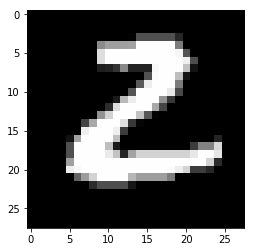

In [5]:
plt.imshow(x0_train[187], cmap='gray')

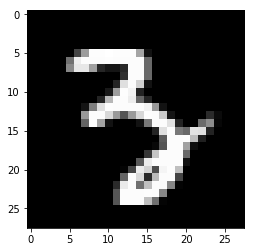

In [7]:
plt.imshow(x0_test[87], cmap='gray')

## 簡單整理一下形狀

In [8]:
x0_test.shape

(10000, 28, 28)

In [9]:
x_train = x0_train.reshape(60000, 28*28)
x_test = x0_test.reshape(10000, 28*28)

## One-hot Embedding

In [10]:
y0_train.shape

(60000,)

In [11]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y0_train,10)
y_test = np_utils.to_categorical(y0_test,10)

In [12]:
y_train.shape

(60000, 10)

## 開始建模型吧

In [13]:
model =  Sequential()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [14]:
model = Sequential()
model.add(Dense(units=500, input_dim=784))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
Total params: 392,500.0
Trainable params: 392,500.0
Non-trainable params: 0.0
_________________________________________________________________


In [15]:
model.add(Dense(units=500))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
Total params: 643,000.0
Trainable params: 643,000.0
Non-trainable params: 0.0
_________________________________________________________________


In [16]:
model.add(Dense(units=10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010.0
Trainable params: 648,010.0
Non-trainable params: 0.0
________________________________________________________________

## 建完模型就把模型編譯起來吧

In [17]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

## 開始訓練模型吧

In [18]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.0837 - acc: 0.3725     
Epoch 2/20
60000/60000 [==============================] - 4s - loss: 0.0627 - acc: 0.6698     
Epoch 3/20
60000/60000 [==============================] - 4s - loss: 0.0432 - acc: 0.7922     
Epoch 4/20
60000/60000 [==============================] - 4s - loss: 0.0311 - acc: 0.8531     
Epoch 5/20
60000/60000 [==============================] - 4s - loss: 0.0244 - acc: 0.8782     
Epoch 6/20
60000/60000 [==============================] - 4s - loss: 0.0205 - acc: 0.8919     
Epoch 7/20
60000/60000 [==============================] - 4s - loss: 0.0181 - acc: 0.9007     
Epoch 8/20
60000/60000 [==============================] - 5s - loss: 0.0164 - acc: 0.9074     
Epoch 9/20
60000/60000 [==============================] - 4s - loss: 0.0151 - acc: 0.9134     
Epoch 10/20
60000/60000 [==============================] - 4s - loss: 0.0141 - acc: 0.9188     
Epoch 11/20
60000/60000 [========================

## 看看在測試資料裡面的分數如何

In [19]:
score = model.evaluate(x_test, y_test, verbose=1)

 9664/10000 [===========================>..] - ETA: 0s

In [20]:
score

[0.010516534281056374, 0.93410000000000004]

In [21]:
print('loss: {}'.format(score[0]))
print('acc: {}'.format(score[1]))

loss: 0.010516534281056374
acc: 0.9341


## 使用模型看看吧

In [22]:
result = model.predict_classes(x_test)

10000/10000 [==============================] - 0s     


3

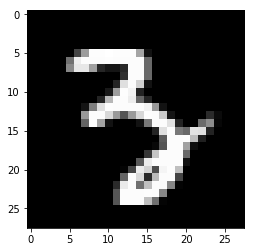

In [25]:
plt.imshow(x0_test[87], cmap='gray')
result[87]

In [26]:
#import gi
#gi.res(gi.base64(plt),result[0],'loss: {}'.format(score[0]),'acc: {}'.format(score[1]))

In [27]:
#%save demo 1-24

## 把模型的形狀跟權重都存下來吧

In [28]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)

model.save_weights('handwriting_model_weights.h5')

# 來試試ETF吧

## 先讀入一隻ETF 的資料與套件

In [29]:
import os, sys, csv
import pandas as pd
import pickle

In [30]:
DIRPATH = '../etf_data/' #ETF資料夾位置

In [31]:
df = pd.read_csv(DIRPATH+'AADR.csv')

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-02-15,45.580002,45.799999,45.580002,45.779999,7800,45.779999
1,2017-02-14,45.900002,45.900002,44.950001,45.450001,22000,45.450001
2,2017-02-13,45.799999,45.799999,45.380001,45.619999,30300,45.619999
3,2017-02-10,44.919998,45.270000,44.770000,45.070000,9200,45.070000
4,2017-02-09,44.320000,44.570000,44.290001,44.330002,3400,44.330002


# 如果我們要用過去二十天的開盤價預測第二十一天的開盤價呢？

## 先把開盤價轉成numpy的array吧

In [33]:
Open = np.array(list(reversed(df['Open'])))

In [34]:
Open

array([ 25.1     ,  25.42    ,  25.540001, ...,  45.799999,  45.900002,
        45.580002])

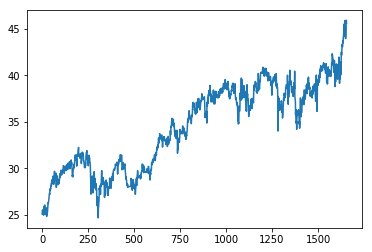

In [35]:
plt.plot(Open)

## 觀察形狀

In [36]:
Open.shape

(1656,)

## 整理資料成為我們要的形狀

In [37]:
X = []
Y = []
for index in range(Open.shape[0]-21):
    X.append(Open[index:index+20])
    Y.append(Open[index+21])
x = np.array(X)
y = np.array(Y)

In [38]:
x.shape

(1635, 20)

In [39]:
y.shape

(1635,)

In [40]:
y = y.reshape(y.shape[0],1)

In [41]:
y.shape

(1635, 1)

## 分割資料為訓練集與測試集
### 我們把前1300組作為訓練，後335組作為測試

In [42]:
x_train = x[0:1300]
y_train = y[0:1300]
x_test  = x[1300:1635]
y_test  = y[1300:1635]

## 我們來建模型吧

In [43]:
model = Sequential()
model.add(Dense(1000,input_dim=20))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
model.summary()
model.compile(loss='mse', optimizer='SGD')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              21000     
_________________________________________________________________
activation_4 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               100100    
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
__________

## 開始訓練模型吧

In [44]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 2/10
1300/1300 [==============================] - 0s - loss: 1130.0749     
Epoch 3/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 4/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 5/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 6/10
1300/1300 [==============================] - 0s - loss: 1130.0749     
Epoch 7/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 8/10
1300/1300 [==============================] - 0s - loss: 1130.0750     
Epoch 9/10
1300/1300 [==============================] - 0s - loss: 1130.0749     
Epoch 10/10
1300/1300 [==============================] - 0s - loss: 1130.0750     


## 使用模型看看吧

In [45]:
result = model.predict_classes(x_test)

 32/335 [=>............................] - ETA: 0s

In [46]:
result

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# 啥，不準，因為你丟進去東西不合理阿

## 試試看漲跌幅吧

In [47]:
Open_Change = []
for index in range(Open.shape[0]-1):
    Open_Change.append((Open[index+1]-Open[index])/Open[index])
Open_Change = np.array(Open_Change)

In [48]:
Open_Change.shape

(1655,)

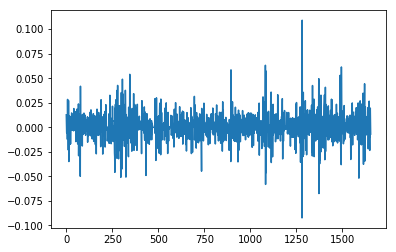

In [49]:
plt.plot(Open_Change)

## 一樣整理形狀

In [50]:
X = []
Y = []
for index in range(Open_Change.shape[0]-21):
    X.append(Open_Change[index:index+20])
    Y.append(Open_Change[index+21])
x = np.array(X)
y = np.array(Y)

y = y.reshape(y.shape[0],1)

x_train = x[0:1300]
y_train = y[0:1300]
x_test  = x[1300:1635]
y_test  = y[1300:1635]

In [51]:
x_train.shape

(1300, 20)

In [52]:
y_train.shape

(1300, 1)

In [53]:
x_test.shape

(334, 20)

In [54]:
y_test.shape

(334, 1)

## 建模

In [55]:
model_etf = Sequential()
model_etf.add(Dense(1000,input_dim=20))
model_etf.add(Activation('sigmoid'))
model_etf.add(Dense(100))
model_etf.add(Activation('sigmoid'))
model_etf.add(Dense(50))
model_etf.add(Activation('sigmoid'))
model_etf.add(Dense(1))
model_etf.add(Activation('softmax'))
model_etf.summary()
model_etf.compile(loss='binary_crossentropy', optimizer='SGD')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              21000     
_________________________________________________________________
activation_8 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               100100    
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
__________

## 訓練模型

In [56]:
model_etf.fit(x_train, y_train)

Epoch 1/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 2/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 3/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 4/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 5/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 6/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 7/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 8/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 9/10
1300/1300 [==============================] - 0s - loss: 15.9365     
Epoch 10/10
1300/1300 [==============================] - 0s - loss: 15.9365     


In [57]:
result = model_etf.predict_classes(x_test)

 32/334 [=>............................] - ETA: 0s

In [58]:
result

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# 還是不準怎麼辦
- 給他更多資料
    - 更長期或更細微的資訊
    - 收盤價
    - 最高價
    - 最低價
    - 成交量
    - 等等
- 調整各項參數
    - 每層神經元數量
    - 激發函數
    - 優化器